In [3]:
from PIL import Image, ImageFilter
import os
from matplotlib import pyplot as plt
import cv2
import numpy as np
from rembg import remove
import halftone
# from wand.image import Image

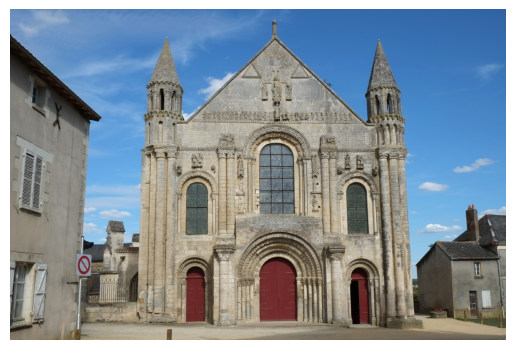

In [2]:
img_path= "D:\\Download_In_D\\3D_Python\\Scene3\\Scene3_MainStructure.jpg"
img = Image.open(img_path)
plt.axis('off')
plt.imshow(img)
plt.show()

HalfTone

In [5]:
from typing import Tuple, Union, Callable

import numpy as np
import PIL.Image

ImgType = Union[PIL.Image.Image, np.ndarray]


def halftone(img: ImgType, spot_fn: Callable[[int, int], float],RGB=0) -> ImgType:
    is_pil = isinstance(img, PIL.Image.Image)
    if is_pil:
        img = array_from_pil(img)
        print(img.shape)
    halftoned = img[:,:,RGB] > evaluate_2d_func(img.shape, spot_fn)
    if is_pil:
        halftoned = pil_from_array(halftoned)
    return halftoned


def euclid_dot(spacing: float, angle: float = 0,channel: int = 3):
    """Circular dot changing to square at 50% grey."""
    pixel_divisor = 2.0 / spacing

    def fn(x: int, y: int,z : int):
        x, y = rotate(x * pixel_divisor, y * pixel_divisor, angle)
        # to make an ellipse multiply sin/cos
        # arguments with different multipliers
        return (0.5 - (0.25 * (
                np.sin(np.pi * (x + 0.5)) +
                np.cos(np.pi * y))))

    return fn

def evaluate_2d_func(img_shape, fn):
    w, h , channel = img_shape
    xaxis = np.arange(w)
    yaxis = np.arange(h)
    return fn(xaxis[:, None], yaxis[None, :],channel)


def rotate(x: float, y: float, angle: float) -> Tuple[float, float]:
    """
    Rotate coordinates (x, y) by given angle.

    angle: Rotation angle in degrees
    """
    angle_rad = angle / 360 * 2 * np.pi
    sin, cos = np.sin(angle_rad), np.cos(angle_rad)
    return x * cos - y * sin, x * sin + y * cos


def transform_grid(spacing, angle):
    def fn(x, y):
        x, y = rotate(x, y, angle)
        coords = np.array([x, y])
        coords = coords / spacing
        coords = coords % 1
        return coords

    return fn


def pil_from_array(arr):
    return PIL.Image.fromarray((arr * 255).astype('uint8'))


def array_from_pil(img):
    return np.array(img) / 255


spot_functions = {
    'euclid': euclid_dot,
}


(2304, 3456, 3)


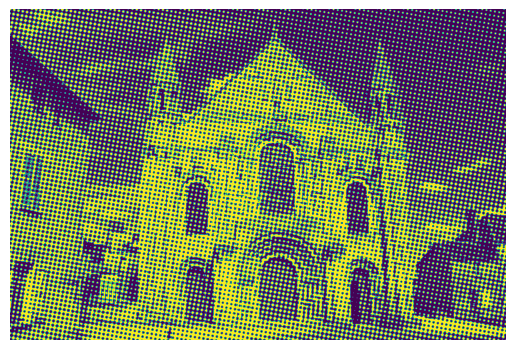

In [8]:
img_path= "D:\\Download_In_D\\3D_Python\\Scene3\\Scene3_MainStructure.jpg"

img = Image.open(img_path)

halftoned = halftone(img, euclid_dot(spacing=30, angle=10),0)

plt.axis('off')
plt.imshow(halftoned)
plt.show()

![SegmentLocal](halftoned_Wenhan.png "segment")
